Memprediksi cuaca menggunakan data historis

Pengolahan data

In [188]:
# import library
import pandas as pd

In [189]:
# inport files csv
from google.colab import files
uploaded = files.upload()

Saving DatasetCuaca.csv to DatasetCuaca (5).csv


In [190]:
weather = pd.read_csv("DatasetCuaca.csv", index_col="Tanggal")
weather

,suhu_max,suhu_min,kelembapan,kecepatan_angin,cuaca
Tanggal,,,,,
2023-11-27,35,24,70,5,Berawan
2023-11-28,35,25,50,10,Cerah
2023-11-29,34,26,75,5,Berawan
2023-11-30,27,26,80,10,Hujan
2023-12-01,27,24,95,10,Hujan
2023-12-02,27,24,90,10,Berawan
2023-12-03,27,24,85,5,Hujan
2023-12-04,33,26,70,15,Berawan
2023-12-05,33,24,80,10,Berawan


In [191]:
weather.apply(pd.isnull).sum()/weather.shape[0]

suhu_max           0.0
suhu_min           0.0
kelembapan         0.0
kecepatan_angin    0.0
cuaca              0.0
dtype: float64

In [192]:
core_weather = weather[["kelembapan","suhu_max", "suhu_min", "kecepatan_angin","cuaca"]].copy()

In [193]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

kelembapan         0.0
suhu_max           0.0
suhu_min           0.0
kecepatan_angin    0.0
cuaca              0.0
dtype: float64

In [194]:
# melihat cuaca yang terjadi di semarang
core_weather["cuaca"].value_counts()

Berawan    8
Hujan      5
Cerah      4
Name: cuaca, dtype: int64

In [195]:
# melihat dan memastikan tipe datanya
core_weather.dtypes

kelembapan          int64
suhu_max            int64
suhu_min            int64
kecepatan_angin     int64
cuaca              object
dtype: object

In [196]:
# memastikan tipe data pada index
core_weather.index

Index(['2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
       '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05', '2023-12-06',
       '2023-12-07', '2023-12-08', '2023-12-09', '2023-12-10', '2023-12-11',
       '2023-12-12', '2023-12-13'],
      dtype='object', name='Tanggal')

In [197]:
# mengkonversi menjadi index waktu tanggal
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
               '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08',
               '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12',
               '2023-12-13'],
              dtype='datetime64[ns]', name='Tanggal', freq=None)

# Analisis

<Axes: xlabel='Tanggal'>

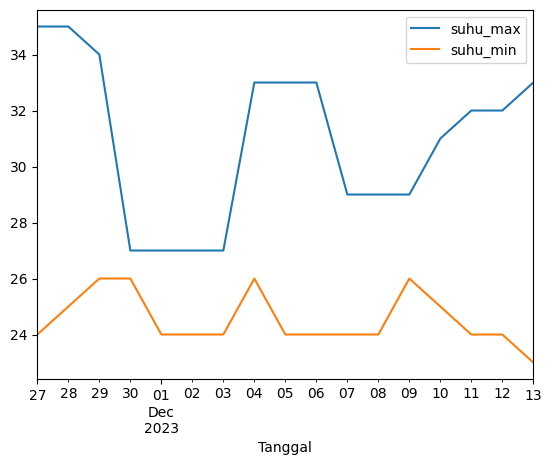

In [198]:
# memplot suhu maximum dan suhu minimum
core_weather[["suhu_max", "suhu_min"]].plot()

<Axes: xlabel='Tanggal'>

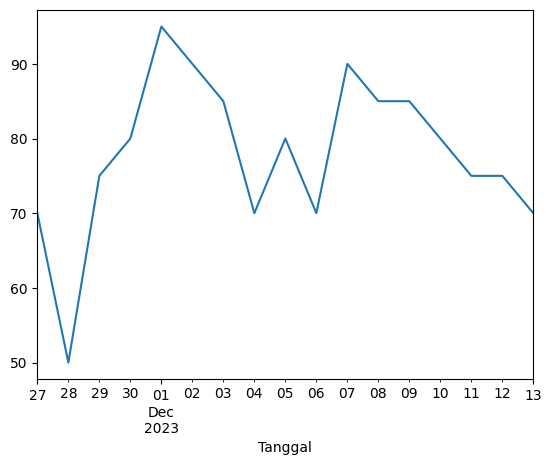

In [199]:
# menampilkan grafik kelembapan
core_weather["kelembapan"].plot()

In [200]:
# mengetahui tingkat kelembapan perharinya
core_weather.groupby(core_weather.index.day).sum(numeric_only=True)["kelembapan"]

Tanggal
1     95
2     90
3     85
4     70
5     80
6     70
7     90
8     85
9     85
10    80
11    75
12    75
13    70
27    70
28    50
29    75
30    80
Name: kelembapan, dtype: int64

In [201]:
# menampilkan suhu maksimal targetnya
core_weather["target"] = core_weather.shift(-1)["suhu_max"]
core_weather

,kelembapan,suhu_max,suhu_min,kecepatan_angin,cuaca,target
Tanggal,,,,,,
2023-11-27,70,35,24,5,Berawan,35.0
2023-11-28,50,35,25,10,Cerah,34.0
2023-11-29,75,34,26,5,Berawan,27.0
2023-11-30,80,27,26,10,Hujan,27.0
2023-12-01,95,27,24,10,Hujan,27.0
2023-12-02,90,27,24,10,Berawan,27.0
2023-12-03,85,27,24,5,Hujan,33.0
2023-12-04,70,33,26,15,Berawan,33.0
2023-12-05,80,33,24,10,Berawan,33.0


In [202]:
# menghilangkan baris terakhir pada 2023-12-13
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,kelembapan,suhu_max,suhu_min,kecepatan_angin,cuaca,target
Tanggal,,,,,,
2023-11-27,70,35,24,5,Berawan,35.0
2023-11-28,50,35,25,10,Cerah,34.0
2023-11-29,75,34,26,5,Berawan,27.0
2023-11-30,80,27,26,10,Hujan,27.0
2023-12-01,95,27,24,10,Hujan,27.0
2023-12-02,90,27,24,10,Berawan,27.0
2023-12-03,85,27,24,5,Hujan,33.0
2023-12-04,70,33,26,15,Berawan,33.0
2023-12-05,80,33,24,10,Berawan,33.0


In [203]:
# Ridge Regression
# regresi ridge berguna dalam memecahkan masalah ketika memiliki kurang dari seratus ribu sampel atau ketika memiliki lebih banyak parameter daripada sampel
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [204]:
predictors = ["kelembapan", "suhu_max", "suhu_min"]

In [205]:
train = core_weather.loc[:"2023-11-30"]

In [206]:
test = core_weather.loc["2023-12-01":]

In [207]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [208]:
predictions = reg.predict(test[predictors])

In [209]:
# import library
from sklearn.metrics import mean_absolute_error

In [210]:
mean_absolute_error(test["target"], predictions)

3.3670540351082607

# Evaluating model

In [211]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
Tanggal,,
2023-12-01,27.0,31.939690
2023-12-02,27.0,32.622324
2023-12-03,33.0,33.304957
2023-12-04,33.0,27.933105
2023-12-05,33.0,33.579078
2023-12-06,29.0,34.944345
2023-12-07,29.0,32.486153
2023-12-08,29.0,33.168786
2023-12-09,31.0,26.157546


<Axes: xlabel='Tanggal'>

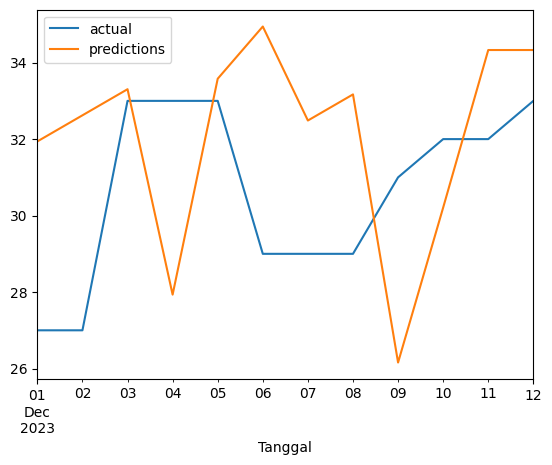

In [212]:
combined.plot()

In [213]:
reg.coef_

array([-0.13652675, -0.06808553, -3.50562024])

Creating A Function To Make Predictions

In [214]:
def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2023-11-30"]
  test = core_weather.loc["2023-12-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined

Adding In Rolling Means

In [215]:
core_weather ["week_max"] = core_weather["suhu_max"].rolling(7).mean()
core_weather

,kelembapan,suhu_max,suhu_min,kecepatan_angin,cuaca,target,week_max
Tanggal,,,,,,,
2023-11-27,70,35,24,5,Berawan,35.0,NaN
2023-11-28,50,35,25,10,Cerah,34.0,NaN
2023-11-29,75,34,26,5,Berawan,27.0,NaN
2023-11-30,80,27,26,10,Hujan,27.0,NaN
2023-12-01,95,27,24,10,Hujan,27.0,NaN
2023-12-02,90,27,24,10,Berawan,27.0,NaN
2023-12-03,85,27,24,5,Hujan,33.0,30.285714
2023-12-04,70,33,26,15,Berawan,33.0,30.000000
2023-12-05,80,33,24,10,Berawan,33.0,29.714286


In [216]:
core_weather ["week_day_max"]= core_weather["week_max"] / core_weather["suhu_max"]
core_weather

,kelembapan,suhu_max,suhu_min,kecepatan_angin,cuaca,target,week_max,week_day_max
Tanggal,,,,,,,,
2023-11-27,70,35,24,5,Berawan,35.0,NaN,NaN
2023-11-28,50,35,25,10,Cerah,34.0,NaN,NaN
2023-11-29,75,34,26,5,Berawan,27.0,NaN,NaN
2023-11-30,80,27,26,10,Hujan,27.0,NaN,NaN
2023-12-01,95,27,24,10,Hujan,27.0,NaN,NaN
2023-12-02,90,27,24,10,Berawan,27.0,NaN,NaN
2023-12-03,85,27,24,5,Hujan,33.0,30.285714,1.121693
2023-12-04,70,33,26,15,Berawan,33.0,30.000000,0.909091
2023-12-05,80,33,24,10,Berawan,33.0,29.714286,0.900433


In [217]:
core_weather ["max_min"] = core_weather["suhu_max"] / core_weather["suhu_min"]
core_weather

,kelembapan,suhu_max,suhu_min,kecepatan_angin,cuaca,target,week_max,week_day_max,max_min
Tanggal,,,,,,,,,
2023-11-27,70,35,24,5,Berawan,35.0,NaN,NaN,1.458333
2023-11-28,50,35,25,10,Cerah,34.0,NaN,NaN,1.400000
2023-11-29,75,34,26,5,Berawan,27.0,NaN,NaN,1.307692
2023-11-30,80,27,26,10,Hujan,27.0,NaN,NaN,1.038462
2023-12-01,95,27,24,10,Hujan,27.0,NaN,NaN,1.125000
2023-12-02,90,27,24,10,Berawan,27.0,NaN,NaN,1.125000
2023-12-03,85,27,24,5,Hujan,33.0,30.285714,1.121693,1.125000
2023-12-04,70,33,26,15,Berawan,33.0,30.000000,0.909091,1.269231
2023-12-05,80,33,24,10,Berawan,33.0,29.714286,0.900433,1.375000


In [218]:
predictors = ["kelembapan", "suhu_max", "suhu_min", "week_max", "week_day_max", "max_min"]
predictors

['kelembapan', 'suhu_max', 'suhu_min', 'week_max', 'week_day_max', 'max_min']

In [234]:
from sklearn.impute import SimpleImputer

# memisahkan kolom non-numerik
non_numeric_columns = core_weather.select_dtypes(exclude=['float64', 'int64']).columns
numeric_columns = core_weather.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi SimpleImputer untuk data numerik
numeric_imputer = SimpleImputer(strategy='mean')

# menerapkan imputasi pada data numerik
core_weather[numeric_columns] = numeric_imputer.fit_transform(core_weather[numeric_columns])

# Manajemen kolom non-numerik (misal, mengganti nilai NaN dengan nilai tertentu atau menghapus kolom)
# Jika ingin menghapus kolom non-numerik yang mengandung NaN
core_weather = core_weather.dropna(subset=non_numeric_columns)

# menggantikan nilai NaN pada kolom non-numerik, menggunakan SimpleImputer dengan strategi yang sesuai, misalnya "most_frequent"
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
core_weather[non_numeric_columns] = non_numeric_imputer.fit_transform(core_weather[non_numeric_columns])

In [235]:
error, combined = create_predictions(predictors, core_weather, reg)
error

2.200265401848212

<Axes: xlabel='Tanggal'>

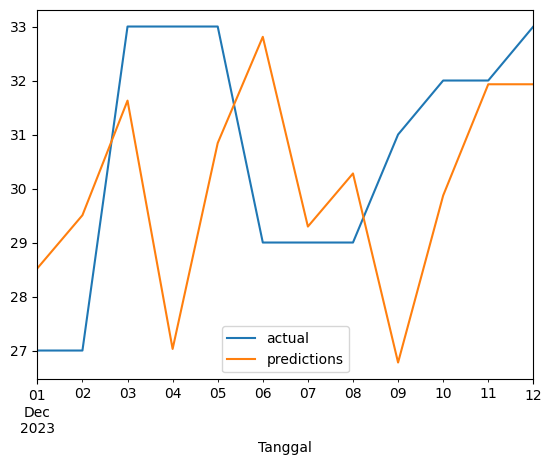

In [233]:
combined.plot()

In [255]:
reg.coef_

array([-0.14271274,  0.03331631, -2.34295612,  0.        ,  0.        ,
        0.13319386,  0.03331631,  0.07226485])

In [260]:
import warnings

# Mengabaikan FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    correlation = core_weather.corr()["target"]

# Tampilkan hasil korelasi
print(correlation)


kelembapan        -0.559923
suhu_max           0.566084
suhu_min          -0.131236
kecepatan_angin   -0.092853
target             1.000000
week_max           0.195759
week_day_max      -0.054419
max_min            0.600200
week_avg           0.232157
day_avg            0.232157
day_of_week_avg    0.558877
Name: target, dtype: float64


In [261]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [262]:
# melihat perbedaan terbesar antara suhu aktual dan perkiraan saya
combined.sort_values("diff", ascending=False).head()
# dapat melihat lima baris teratas yang nilai aktualnya berbeda dari prediksi saya

,actual,predictions,diff
Tanggal,,,
2023-12-09,31.0,26.123385,4.876615
2023-12-06,29.0,33.445602,4.445602
2023-12-04,33.0,28.762260,4.237740
2023-12-02,27.0,29.985021,2.985021
2023-12-10,32.0,29.296452,2.703548
